In [9]:

# imports
from sklearn.datasets import load_wine
import pandas as pd
from sklearn.model_selection import train_test_split
import torch

# Aufruf von load_wine aus sklearn.datasets
data = load_wine()

# data ist ein Objekt, welches ein Feld data hat, in die Inputdaten liegen
X = data.data

# die Daten werden in einen Dataframe zusammengefasst (Tabelle)
# die Werte in den Spalten sind X
# die Spaltennamen kommen aus data.feature_names
df = pd.DataFrame(X, columns=data.feature_names)

# wir holen uns die Spalte alcohol und speichern sie in y
y = df['alcohol']
# Löschen der Spalte Alkohol aus df
df = df.drop("alcohol", axis=1)
# Ausgabe der ersten 5 Zeilen
df.head()

,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [11]:
# Skalieren der Daten

# Import des Scalers
from sklearn.preprocessing import StandardScaler
# Objekt vom Typ StandardScaler wird erzeugt und in scaler gespeichert
scaler = StandardScaler()
# alle Spalten in df werden skaliert, d.h. der Zahlenbereich wird angepasst
scaled_data = scaler.fit_transform(df)
# Die Daten werden wieder in einer Tabelle zusammengefasst
df = pd.DataFrame(scaled_data)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [3]:
# df und y werden aufgeteilt in vier verschiedene Variablen
# x_train: die X-Werte, mit denen die KI trainiert werden
# y_train: die Erwartungswerte für x_train
# x_test, y_test: die Werte werden benutzt um zu prüfen, ob die KI was gelernt hat
x_train, x_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)


In [4]:
# Die Arrays werden in Torch-Tensors umgewandelt
# Pytorch kann nur mit Tensoren arbeiten
# Der Datentyp aller Tensoren ist float
x_train = torch.tensor(x_train.values, dtype=torch.float)
x_test = torch.tensor(x_test.values, dtype=torch.float)
y_train = torch.tensor(y_train.values, dtype=torch.float)
y_test= torch.tensor(y_test.values, dtype=torch.float)

In [12]:
# Forward-Propagation, d.h. die Berechnung von y_hat
def forward(x):
    # x@w1 ist z2
    # addieren wir zu z2 ein b1 (d.h. eine Zahl) (bias, d.h. quasi die Verschiebung auf der y-Achse)
    # danach schieben wir das in relu --> a2
    a2= torch.relu(x @ w1 + b1)
    a3 = torch.relu(a2 @ w2 + b2)
    y_hat = a3
    return y_hat

# Überlegungen zur Netzarchitektur
Wir haben 12 Attribute / Spalten / Features
Wir haben 142 Traingsbeispiele
Angenommen, ein HiddenLayer mit 100 Neuronen

w1: von 12 auf 100   | warum 12? --> das sind die 12 Spalten des Datasets
w2: von 100 auf 1    | warum 1?  --> Wir wollen genau eine Zahl als Ergebnis haben (Alkoholgehalt)

  0%|          | 0/50 [00:00<?, ?it/s]

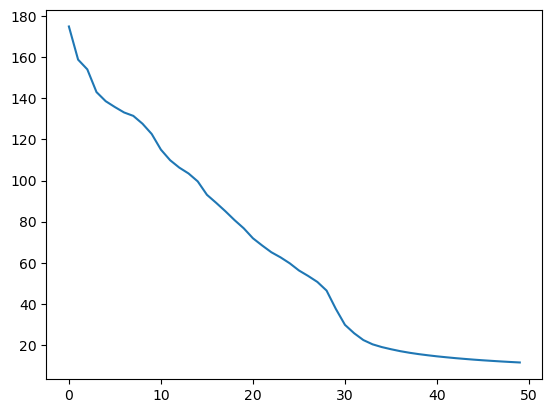

In [13]:
# Weigths w1 werden initialisiert
# size=(12, 100) bedeutet, das Array (der Tensor) ist 12x100 groß
# std=1.0 --> Die Standardabweichung der Random-Zahlen ist 1
# mean=0.0 --> Der Durchschnitt der Random-Zahlen ist 0
# requires_grad=True --> Wir brauchen die Ableitung von diesem Tensor
w1 = torch.normal(size=(12, 100), std=1.0, mean=0.0, requires_grad=True)
w2 = torch.normal(size=(100, 1), std=1.0, mean=0.0, requires_grad=True)

# Die Zahl mit der wir addieren bevor wir zu z2 kommen, soll erstmal 0 sein und ableitbar sein
b1 = torch.tensor(0.0, requires_grad=True)
# Die Zahl mit der wir addieren bevor wir zu y_hat kommen, soll erstmal 0 sein und ableitbar sein
b2 = torch.tensor(0.0, requires_grad=True)

# Lernrate
lr=0.0001

# Trainingsfunktion
def train(single_x, single_y):
    # Aufruf der forward-Methode mit single_x
    y_hat=forward(single_x)
    # Berechnung des Loss, also des Fehlers, die die KI gemacht hat
    loss = (y_hat - single_y)**2
    # berechne die Ableitung für alle Tensoren, die zu loss beigetragen haben, die requires_grad=True haben
    loss.backward()
    # Das hier bitte nicht ableiten
    with torch.no_grad():
        # Wir subtrahieren von w1 den Gradienten von w1 * Lernrate
        w1.sub_(w1.grad * lr)
        w2.sub_(w2.grad * lr)
        b1.sub_(b1.grad * lr)
        b2.sub_(b2.grad * lr)
        # Ableitungen werden zurückgesetzt
        w1.grad.zero_()
        w2.grad.zero_()
        b1.grad.zero_()
        b2.grad.zero_()
    # Rückgabewert ist der Wert vom loss
    return loss.item()

# Erstellung eines leeren Arrays
losses=[]
# Import
from tqdm.notebook import tqdm
# Iteriere 50x
# zeige eine Progressbar an
for epoch in tqdm(range(50)):
    loss_sum=0
    # Iteriere so oft, wie x_train groß ist
    for i in range(len(x_train)):
        # trainiere mit den aktuellen x_train und y_train-Daten
        # der Rückgabewert (das Loss) wird zu loss_sum aufaddiert
        loss_sum += train(x_train[i], y_train[i])
    # Berechne das durchschnittliche Loss der Epoche und füge es dem Array losses hinzu
    losses.append(loss_sum/len(x_train))

#plotten der losses
import matplotlib.pyplot as plt
plt.plot(losses)

In [14]:
errorSum=0
# iteriere so oft, wie x_test groß ist
for i in range(len(x_test)):
    # Forward-Propagation für den jeweiligen Testdatensatz
    y_hat=forward(x_test[i])
    # ground truth
    y = y_test[i]
    # berechnen der absoluten Differenz zwischen dem was die KI sagt und der ground truth
    errorSum += torch.abs(y_hat - y)

print("mean absolute error:" , errorSum/len(x_test))

mean absolute error: tensor([2.5267], grad_fn=<DivBackward0>)


In [16]:
y_test.mean()

tensor(13.0856)